In [246]:
import io
import matplotlib.pyplot as plt
from matplotlib import image
from pathlib import Path
import os.path
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf

In [21]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "archive (3).zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')


Extracting all the files now...
Done!


In [52]:
dataset_url="./New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"


In [50]:
traindata_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
valdata_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [53]:
traindata=traindata_gen.flow_from_directory(dataset_url+"/train",
                                            target_size=(256,256),
                                            class_mode="categorical",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory(dataset_url+"/valid",
                                         target_size=(256,256),
                                         class_mode="categorical",
                                         batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [154]:
label_map = (validdata.class_indices)
classes=[k for k,v in label_map.items()]
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [59]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(38,activation="softmax")
])

''' 
Here we use Categorical_crossentropy instead of SparseCategoricalCrossEntropy because the instance of ImageDataGenerator 
One-hot encodes the labels,Categorical_crossentropy only accepts the lables with one-hot encoded.
'''

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [248]:
path_checkpoint = "training_1/cp.ckpt"
directory_checkpoint = os.path.dirname(path_checkpoint)

callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(traindata,epochs=10,
           steps_per_epoch=len(traindata),
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[callback])

Epoch 1/10
2197/2197 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9886
Epoch 1: saving model to training_1\cp.ckpt
2197/2197 [==============================] - 278s 126ms/step - loss: 0.0383 - accuracy: 0.9886 - val_loss: 1.3296 - val_accuracy: 0.8017
Epoch 2/10
2197/2197 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9886
Epoch 2: saving model to training_1\cp.ckpt
2197/2197 [==============================] - 204s 93ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 1.4150 - val_accuracy: 0.8072
Epoch 3/10
2197/2197 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.9880
Epoch 3: saving model to training_1\cp.ckpt
2197/2197 [==============================] - 199s 91ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 1.3777 - val_accuracy: 0.7959
Epoch 4/10
2197/2197 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9925
Epoch 4: saving model to training_1\cp.ckpt
2197/2197 [============

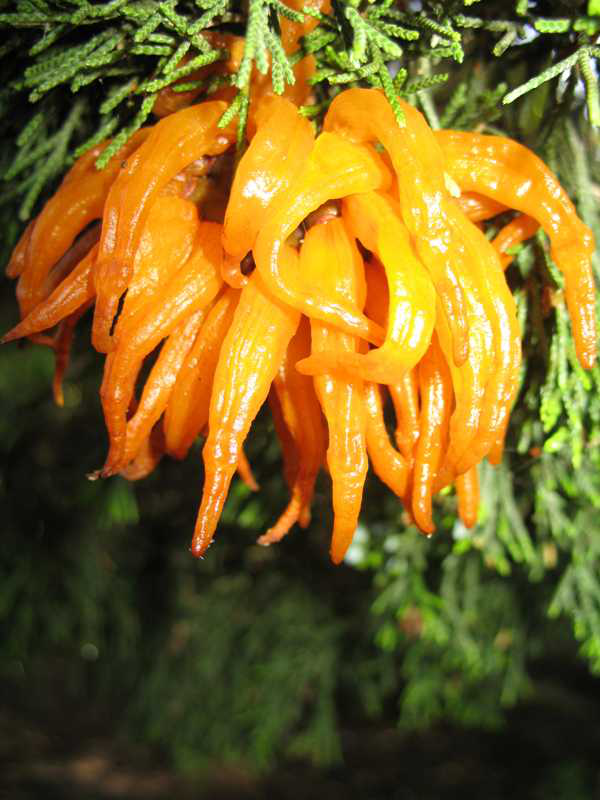

In [267]:
image_url="https://www.missouribotanicalgarden.org/Portals/0/Gardening/Gardening%20Help/images/Pests/CedarApple_Rust617.jpg"
image_data=tf.keras.utils.get_file('cedar_3',origin=image_url)
Image.open(image_data)  

In [268]:
image_data=tf.keras.utils.load_img(
    image_data,
    grayscale=False,
    color_mode='rgb',
    target_size=(256,256),
    interpolation='nearest',
    keep_aspect_ratio=False
)
image_array=tf.keras.utils.img_to_array(image_data)
img_array = tf.expand_dims(image_array, 0) # Create a batch

In [269]:
y_pred = model.predict(img_array)
score = tf.nn.softmax(y_pred[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to Strawberry___Leaf_scorch with a 6.84 percent confidence.


In [270]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('plant_disease_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\austi\AppData\Local\Temp\tmp_gbe_6yw\assets


INFO:tensorflow:Assets written to: C:\Users\austi\AppData\Local\Temp\tmp_gbe_6yw\assets


In [271]:
TF_MODEL_FILE_PATH = 'plant_disease_model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [272]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['conv2d_11_input'], 'outputs': ['dense_5']}}

In [273]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [274]:
predictions_lite = classify_lite(conv2d_11_input=img_array)['dense_5']
score_lite = tf.nn.softmax(predictions_lite)


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Strawberry___Leaf_scorch with a 6.84 percent confidence.
